In [25]:
import pandas as pd
import numpy as np
import datetime
import os
from IPython.display import display

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

from MyTransformers import *
from sklearn.model_selection import train_test_split

from statsmodels.tsa.holtwinters import ExponentialSmoothing

#%config Completer.use_jedi = False
%matplotlib inline  
plt.rcParams['figure.figsize'] = [20, 5]

import warnings
warnings.filterwarnings("ignore")

In [2]:
f_data_path = "PrepedData/"
f_data_LPG = "Data/LPG/"
temperatureFileName = "Temperature.csv"
electricityFileName = "SumProfiles.Electricity.csv"
prof2 = "CHR03 in HT02/"
prof3 = "H01 in HT02/"
prof4 = "SHO01 CHS01 in HT06/"
prof5 = "CHR03 Family, 1 child, both at work/"
file = f_data_LPG + prof5

In [47]:
df = pd.read_csv(file + electricityFileName,sep=';')
df.Time = pd.to_datetime(df.Time, format="%d.%m.%Y %H:%M")
# df.rename(columns = {"Time": "date"}, inplace = True)

In [48]:
temp = pd.read_csv(file + temperatureFileName,sep=';')#, parse_dates=['DateTime'])
temp.DateTime = pd.to_datetime(temp.DateTime, format="%d.%m.%Y %H:%M")

In [120]:
df = df.sort_values('Time').reset_index(drop=True,inplace=True)

In [49]:
all = temp.merge(df, left_on = 'DateTime',right_on = 'Time',how = 'left')
all = all[['Time', 'Sum [kWh]', 'Temperature']]
all.rename(columns = {"Time": "date", 'Sum [kWh]':"energy", 'Temperature': 'temp'}, inplace = True)

In [19]:
import winsound
winsound.Beep(1000, 300)

In [43]:
all.to_feather(f_data_path + "LPG-Profile-1.feather")

In [3]:
data = pd.read_feather(f_data_path + "LPG-Profile-4.feather")

In [85]:
f_data_path = "PrepedData/"
orginal = pd.read_feather(f_data_path + "LPG-Profile-4.feather")['energy'].values
orginal = np.sum(orginal.reshape(-1,120),axis=1)


## Box-Cox

In [ ]:
data,lam = stats.boxcox(orginal)

c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

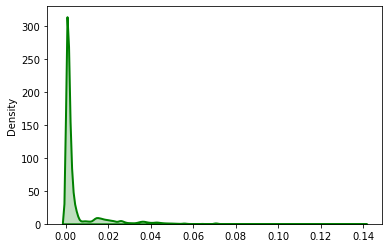

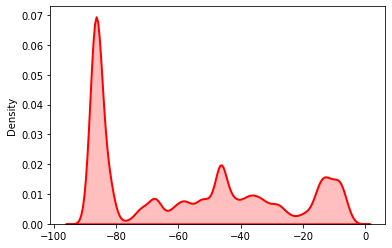

In [9]:
from matplotlib import pyplot as plt
sns.distplot(orginal, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green")
plt.figure()
sns.distplot(data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red")

c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

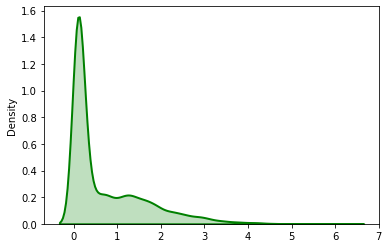

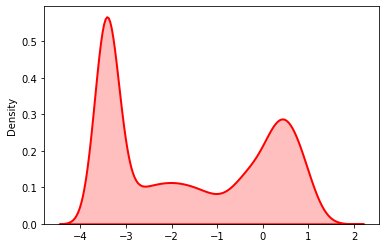

In [11]:
from matplotlib import pyplot as plt
sns.distplot(orginal, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green")
plt.figure()
sns.distplot(data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="red")

In [16]:
from scipy.special import inv_boxcox
trans = inv_boxcox(data[:50],lam)

In [14]:
trans = (data[:50]**lam - 1) / lam

c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


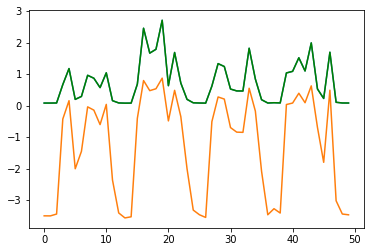

In [17]:
plt.plot(orginal[:50])
plt.plot(data[:50])
plt.plot(trans,'g')

## Stacinaryit of Time Series

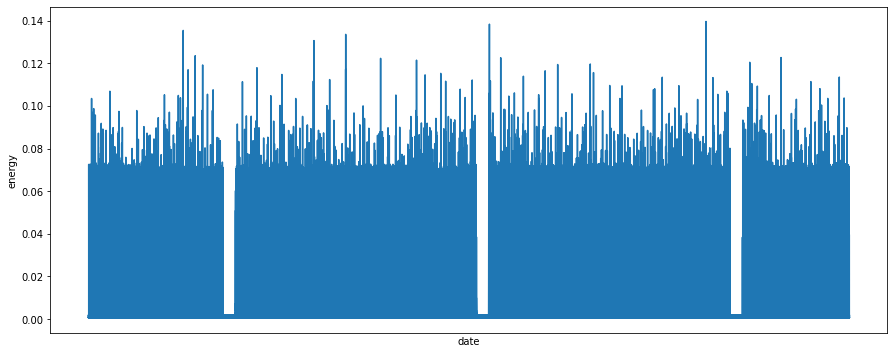

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

fig=plt.figure(figsize=(15,6))
sns.lineplot(orginal)
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False) 
plt.show()

In [8]:
result=adfuller (orginal)
print('Test Statistic: %f' %result[0])
print('p-value: %f' %result[1])
print('Critical values:')
for key, value in result[4].items ():
     print('\t%s: %.3f' %(key, value))

Test Statistic: -13.927282
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [9]:
result_kpss_ct=kpss(orginal,regression="ct")
print('Test Statistic: %f' %result_kpss_ct[0])
print('p-value: %f' %result_kpss_ct[1])
print('Critical values:')
for key, value in result_kpss_ct[3].items():
     print('\t%s: %.3f' %(key, value))

Test Statistic: 0.074478
p-value: 0.100000
Critical values:
	10%: 0.119
	5%: 0.146
	2.5%: 0.176
	1%: 0.216


c:\Users\jurek\.pyenv\pyenv-win\versions\3.7.4-amd64\lib\site-packages\statsmodels\tsa\stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


[  6   9 157 313] {'peak_heights': array([1.00714021, 1.08245466, 1.49793637, 1.45173074])}


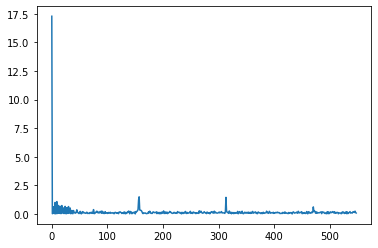

In [52]:
from scipy.signal import find_peaks
x = np.sum(orginal.reshape(-1,120*12),axis=1)
y = np.fft.fft(x)
y = 2.0 / len(x) * np.abs(y[:len(x)//2])

plt.plot(np.abs(y))
index, prop = find_peaks(y,height=1)
print(index,prop)

In [216]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [96]:
xdiff = orginal#np.sum(orginal.reshape(-1,180),axis=1)
#xdiff = xdiff[1:] - xdiff[:-1]
xdiff = xdiff[6:] - xdiff[:-6]
# xdiff = xdiff[56:] - xdiff[:-56]


#xdiff = np.diff(xdiff,4)

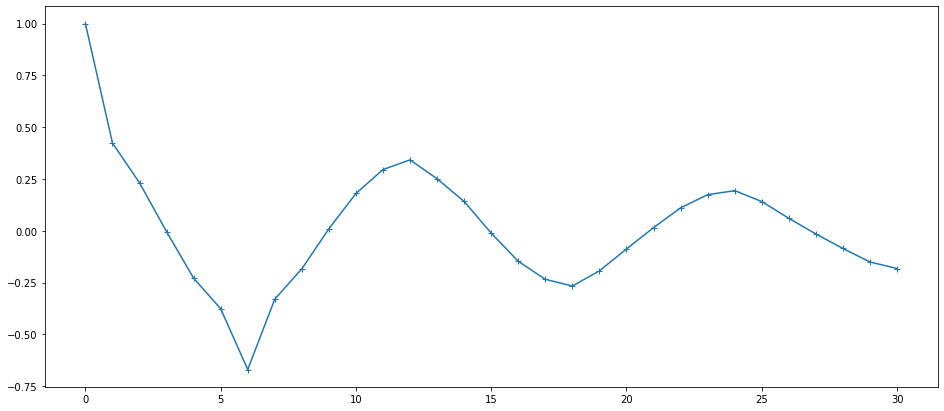

In [97]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(xdiff, nlags=30)
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_acf,marker='+')

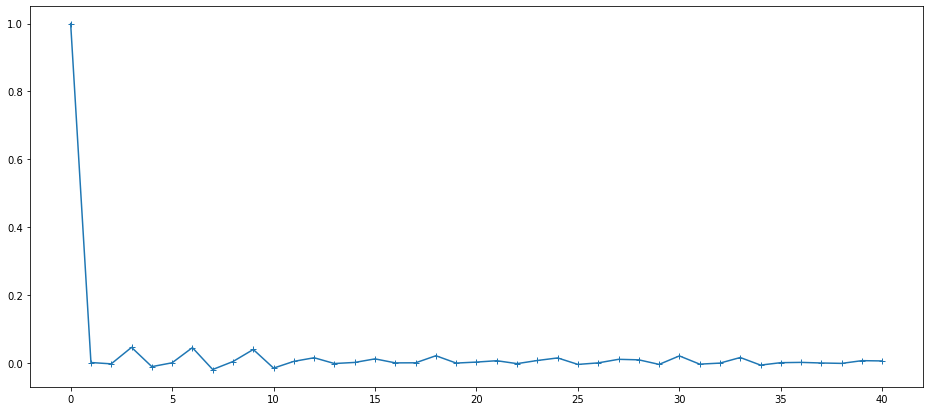

In [58]:
lag_pacf = pacf(y, nlags=40, method='ols')
#Plot PACF:
plt.figure(figsize=(16, 7))
plt.plot(lag_pacf,marker='+')

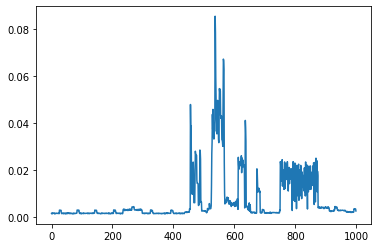

In [19]:
from matplotlib import pyplot as plt

## Other

In [ ]:
def reduce_mem_usage(df: pd.DataFrame,
                     verbose: bool = True) -> pd.DataFrame:
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2

    for col in df.columns:
        col_type = df[col].dtypes

        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()

            if str(col_type)[:3] == 'int':

                if (c_min > np.iinfo(np.int32).min
                      and c_max < np.iinfo(np.int32).max):
                    df[col] = df[col].astype(np.int32)
                elif (c_min > np.iinfo(np.int64).min
                      and c_max < np.iinfo(np.int64).max):
                    df[col] = df[col].astype(np.int64)
            else:
                if (c_min > np.finfo(np.float16).min
                        and c_max < np.finfo(np.float16).max):
                    df[col] = df[col].astype(np.float16)
                elif (c_min > np.finfo(np.float32).min
                      and c_max < np.finfo(np.float32).max):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    reduction = (start_mem - end_mem) / start_mem

    msg = f'Mem. usage decreased to {end_mem:5.2f} MB ({reduction * 100:.1f} % reduction)'
    if verbose:
        print(msg)

    return df

## Add Exponential Smothing

In [3]:
data = pd.read_feather(f_data_path + "LPG-Profile-4.feather")

In [50]:
data = all

In [4]:
sumIn = 180
pred_n = 16
df = data.groupby(np.arange(len(data)) // sumIn).agg( date=('date',lambda d: d.mean()),energy =('energy','sum'), temp=('temp','mean'))

In [82]:
model = ExponentialSmoothing(
    df['energy'].values,
    seasonal_periods=int((24*60/sumIn) * 7),
    seasonal="add",
    use_boxcox=False,
    initialization_method="estimated",
).fit()
pred = model.predict(start=0,end=len(df)-1 + pred_n)

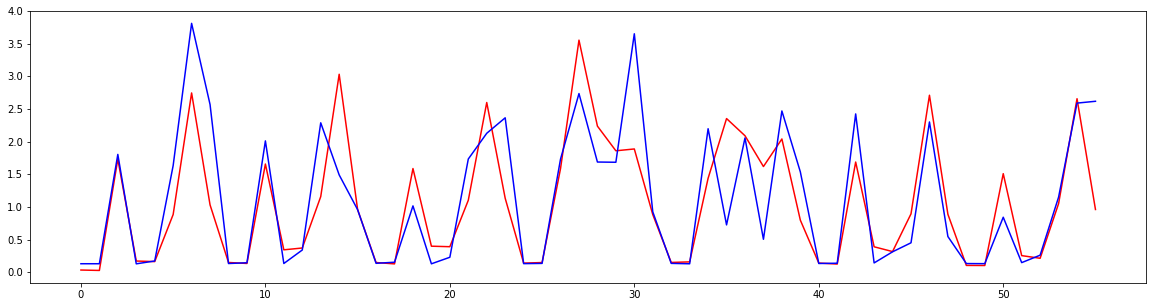

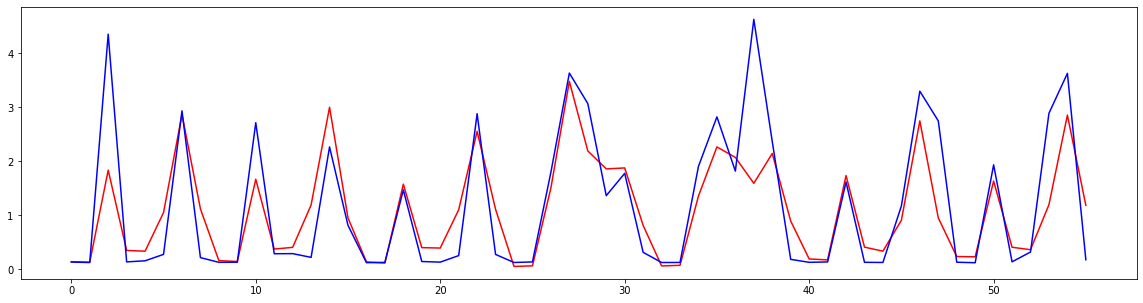

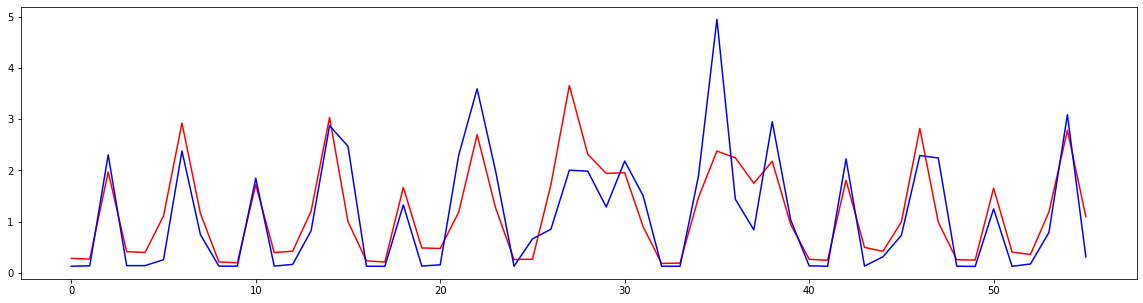

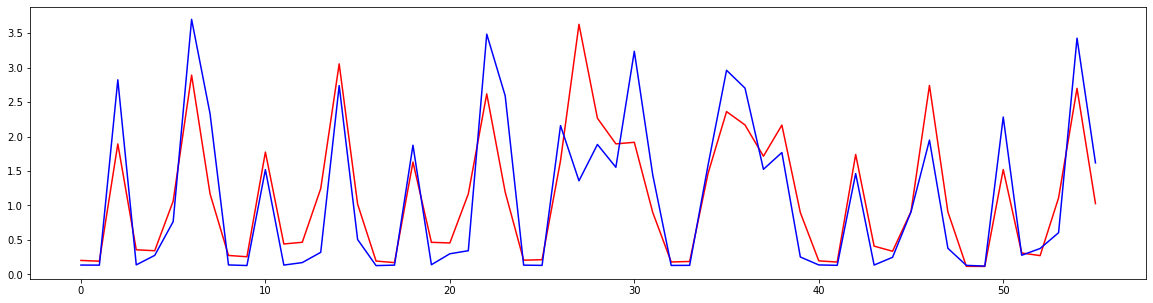

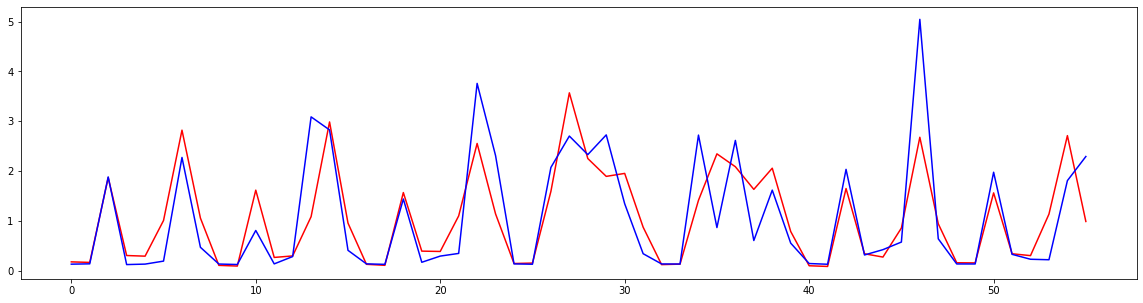

In [23]:
#Show Exponentila Prediction
r = 56
for i in range(1,6):
    plt.figure(figsize=(20,5)) 
    plt.plot(pred[r*i:r*(i+1)],'r')
    plt.plot(df['energy'].values[r*i:r*(i+1)],'b')

In [7]:
#expPred = np.roll(pred,-pred_n)

In [84]:
df['expSmooth'] = pred[:-pred_n]
df['expSmoothPrediction'] = pred[pred_n:]
df['expError'] = df['energy'] - df['expSmooth']

In [59]:
df.to_feather(f_data_path + "LPG-Profile-4-plus-exp.feather")

In [81]:
df.columns

Index(['date', 'energy', 'temp', 'expSmooth', 'expSmoothPrediction',
       'expError'],
      dtype='object')

## Add Time Percent

In [55]:
df['dayPer'] = df['date'].dt.hour/24 + df['date'].dt.minute/(24*60)
df['yearPer'] = df['date'].dt.month/12 + df['date'].dt.day/(12*df['date'].dt.days_in_month)
df['weekPer'] = df['date'].dt.hour/(24*7) + df['date'].dt.minute/(24*60*7) + (df['date'].dt.weekday)/(7) # month aproximation

In [56]:
df['dayPer'] = np.roll(df['dayPer'],-pred_n)
df['yearPer'] = np.roll(df['yearPer'],-pred_n)
df['weekPer'] = np.roll(df['weekPer'],-pred_n)


In [58]:
df.temp = np.roll(df.temp,-pred_n)

## Test My Exponential Smoothing

In [35]:
h = 100
m = int((24*60/sumIn)*7)
x = df.energy.values
A = np.mean(x[:-(len(x) % m)].reshape(-1,m),axis=1)
s0 = [np.mean(x[np.arange(len(x)) % m == i][:len(A)]-A) for i in range(m)]
b0 = ((x[m:m+m] - x[:m]) / m).mean()


In [18]:
s = 0.6941378534097052
b = 0
c = [-0.61868787, -0.63112617, -0.6288982 ,  0.7989203 , -0.29133618,
       -0.5712235 , -0.56782633, -0.48917946,  0.14371578,  1.4119769 ,
        0.5848501 , -0.222511  , -0.6144541 , -0.63040143, -0.6290988 ,
        0.610601  , -0.26832828, -0.52023685, -0.500894  , -0.44605428,
        0.2766341 ,  1.5456675 ,  0.5663487 , -0.3052936 , -0.6058487 ,
       -0.6304511 , -0.6259649 ,  0.56370854, -0.25028253, -0.4448789 ,
       -0.45197272, -0.38180232,  0.2331809 ,  1.3124765 ,  0.5191269 ,
       -0.18281664, -0.62766093, -0.6291413 , -0.61925834,  0.21512394,
        0.7702573 ,  1.9834408 ,  0.6524995 ,  0.93243504,  0.40343934,
        0.6428404 ,  0.29767224, -0.28419408, -0.62933445, -0.63127106,
       -0.6204825 ,  0.0477193 ,  0.6826208 ,  0.8481693 ,  0.50739336,
        0.8165313 ,  0.26716548,  0.8070694 ,  0.2735791 , -0.30557472,
       -0.610341  , -0.63134825, -0.62576663,  0.6965652 , -0.29732776,
       -0.4728164 , -0.5333164 , -0.46884787,  0.05182358,  1.2713616 ,
        0.54055744, -0.33757707, -0.6248178 , -0.6308714 , -0.62732273,
        0.58713263, -0.36957607, -0.5363586 , -0.56022036, -0.4966027 ,
        0.2428813 ,  1.3579272 ,  0.47739565, -0.26121238]

In [19]:
def predFeatureNoPre(start,end, L, st, bt, ct):
    fitted = np.zeros(end-start)
    for m in range(start,end):
        fitted[m-start] = st + m*bt + ct[(m - 1) % L]

    # fitted = [st + m*bt + ct[(m - 1) % L] for m in range(h)]
    return fitted

In [20]:
#x len must be of L - season sampls count"
def fit(s0,N,x):
    a = x.mean()
    for i in range(len(x)):
        s0[i] = s0[i]*N/(N+1) + (x[i] - a)/(N+1)
    return s0,N +1 

In [74]:
def predFeature(x, h, m, alpha, beta, gamma, initial_level, initial_trend, initial_seasons):
    alphac = 1 - alpha
    betac = 1 - beta if beta is not None else 0
    gammac = 1 - gamma if gamma is not None else 0

    # s = np.zeros((len(data) + h + 1,))
    # s[0] = initial_level
    b = np.zeros((len(x) + h + 1,))
    c = np.zeros((len(x) + m + 1,))

    s = [initial_level, 0]
    b[0] = initial_trend if initial_trend is not None else 0
    c[:m] = initial_seasons

    nobs = len(x)

    for i in range(1, nobs + 1):
        s[1] = alpha * (x[i - 1] - c[i - 1]) + alphac * (s[0] + b[i - 1])
        b[i] = beta * (s[1] - s[0]) + (betac * b[i - 1])
        c[i + m - 1] = gamma * (x[i - 1] - gamma * (s[0] + b[i - 1])) + (gammac * c[i - 1])

        s[0] = s[1]
    
    k = s[1] + c
    fitted = np.zeros(h)
    for i in range(h):
        fitted[i] = s[1] + i*b[nobs + 1] + c[nobs + 2 - m + (i - 1) % m]

    return np.concatenate((k,fitted))

In [43]:
alpha = 0.031324384588082115
gamma = 1.0429298296798e-06
df.energy[0]

0.12848336089200726

In [67]:
p0.shape, p1.shape

((8869,), (1578497,))

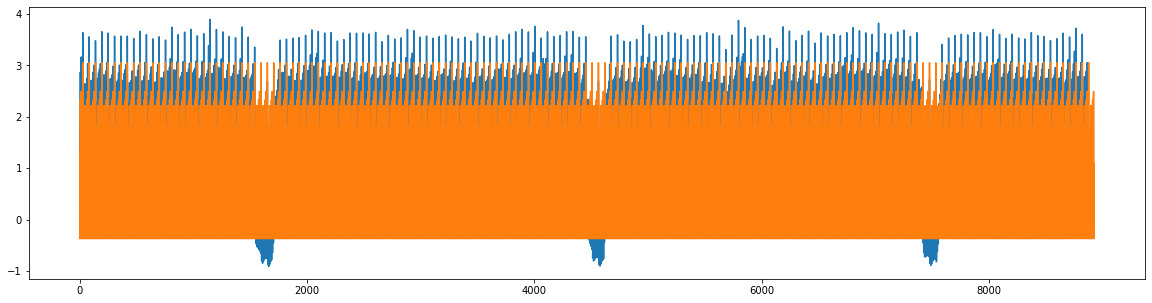

In [81]:
p0 = model.predict(start=0,end=len(df)+100)
p1 = predFeature(df.energy.values, 100, 8*7, alpha, 0.5, gamma, df.energy[0], b0, s0)
plt.plot(p0)
plt.plot(p1)


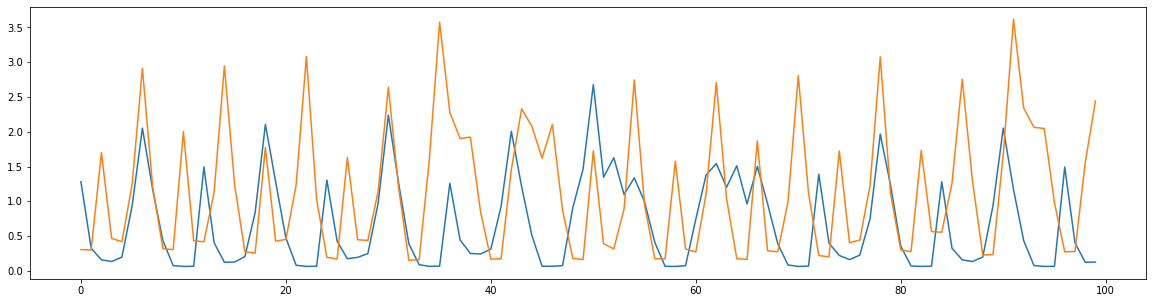

In [30]:
plt.plot(predFeatureNoPre(1000,1100,12*7,s,b,c))
plt.plot(df.expSmooth[1000:1100].values)

In [22]:
df

,date,energy,temp,expSmooth,expSmoothPrediction,expError
0,2020-01-01 01:29:30,0.128483,-10.2,0.167470,0.276616,-0.038987
1,2020-01-01 04:29:30,0.129236,-10.2,0.156825,0.251780,-0.027589
2,2020-01-01 07:29:30,0.864285,-10.2,1.859883,1.707998,-0.995598
3,2020-01-01 10:29:30,1.187197,-10.2,0.263509,0.523109,0.923688
4,2020-01-01 13:29:30,0.526588,-10.2,0.285312,0.567105,0.241276
...,...,...,...,...,...,...
8763,2022-12-31 10:29:30,2.300625,-12.4,3.724479,0.326242,-1.423853
8764,2022-12-31 13:29:30,2.417711,-12.4,2.387971,0.431671,0.029739
8765,2022-12-31 16:29:30,0.593822,-12.4,2.028208,1.341104,-1.434387
8766,2022-12-31 19:29:30,1.894245,-12.4,2.016761,3.164848,-0.122516
